In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv") # Loading the dataset
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
df.head() # First 5 records of the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# Shape of the dataset show number of rows and columns respectively 
df.shape

(20640, 10)

In [5]:
df.keys() # keys used to show which are the columns are present in the dataset

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [6]:
df.duplicated().sum() # It shows that there is no Duplicated Values present in the dataset.

0

In [7]:
df.describe().round() # used to Generate descriptive statistics summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0,20640.0,20640.0,20640.0,20433.0,20640.0,20640.0,20640.0,20640.0
mean,-120.0,36.0,29.0,2636.0,538.0,1425.0,500.0,4.0,206856.0
std,2.0,2.0,13.0,2182.0,421.0,1132.0,382.0,2.0,115396.0
min,-124.0,33.0,1.0,2.0,1.0,3.0,1.0,0.0,14999.0
25%,-122.0,34.0,18.0,1448.0,296.0,787.0,280.0,3.0,119600.0
50%,-118.0,34.0,29.0,2127.0,435.0,1166.0,409.0,4.0,179700.0
75%,-118.0,38.0,37.0,3148.0,647.0,1725.0,605.0,5.0,264725.0
max,-114.0,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500001.0


In [8]:
df.isnull().sum() # checking for missing Values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
# we have 207 null values. We can replace the null values.
df = df.fillna(df.mean())
df.isna().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In the given datasets we have 9 continuous variables and one categorical variable. 
we will convert the categorical data.

# Working with categorical data

In [11]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

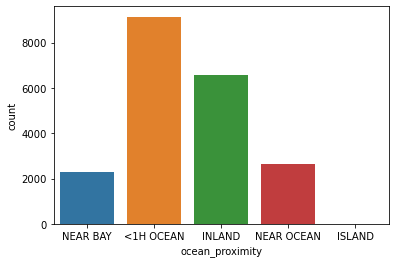

In [12]:
sns.countplot(df.ocean_proximity)

In [13]:
new_val = pd.get_dummies(df.ocean_proximity)

In [14]:
new_val.head(5)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [15]:
df[new_val.columns] = new_val

In [16]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [18]:
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [19]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,0.321121,-0.055575,0.009446,-0.474489,0.045509,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.446969,0.351166,-0.016572,0.358771,-0.160818,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.045300,-0.236645,0.017020,0.255172,0.021622,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,-0.003031,0.025624,-0.007572,-0.023022,-0.009175,0.134153
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.018220,-0.006433,-0.004361,-0.019785,0.000676,0.049454
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,0.074613,-0.020732,-0.010412,-0.060880,-0.024264,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.042435,-0.039402,-0.009077,-0.010093,0.001714,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.168876,-0.237496,-0.009228,0.056197,0.027344,0.688075
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018220,0.074613,0.042435,0.168876,1.000000,-0.607669,-0.013872,-0.314813,-0.342620,0.256617
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006433,-0.020732,-0.039402,-0.237496,-0.607669,1.000000,-0.010614,-0.240887,-0.262163,-0.484859


Text(0.5, 1.0, 'Correlation among all the Variables of the Dataset')

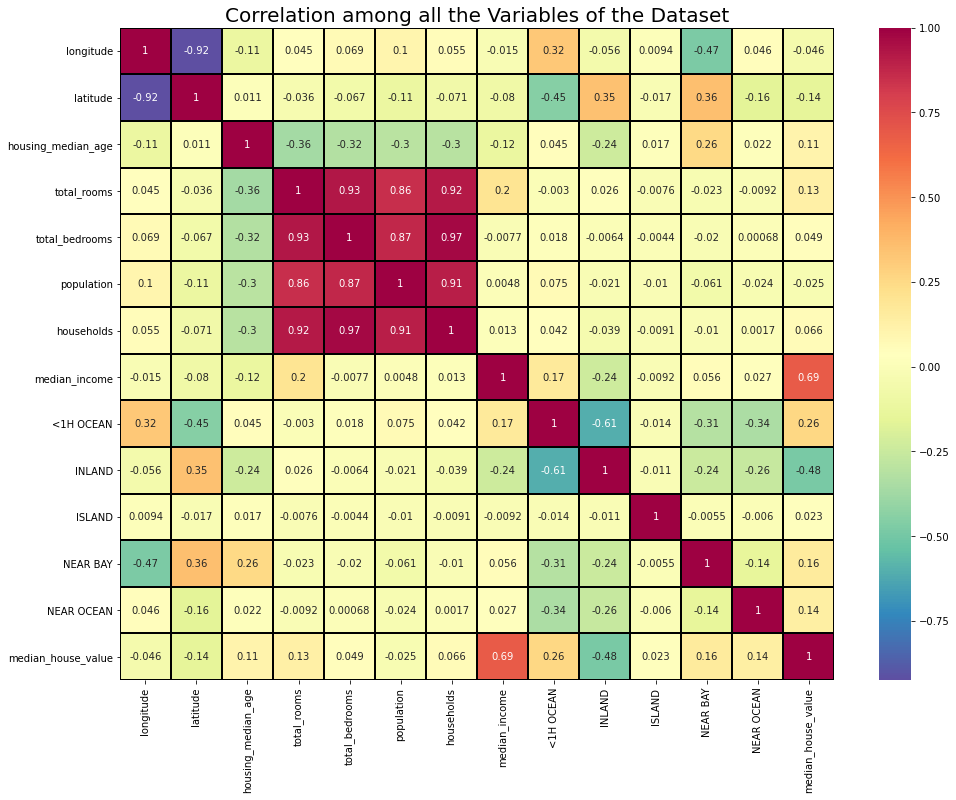

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='Spectral_r', annot=True, linecolor='Black', linewidths=1.0)
plt.title("Correlation among all the Variables of the Dataset", size=20)

In [21]:
df.corr().sort_values(ascending=False, by = 'median_house_value').median_house_value

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>,
        <AxesSubplot:title={'center':'NEAR BAY'}>],
       [<AxesSubplot:title={'center':'NEAR OCEAN'}>,
        <AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

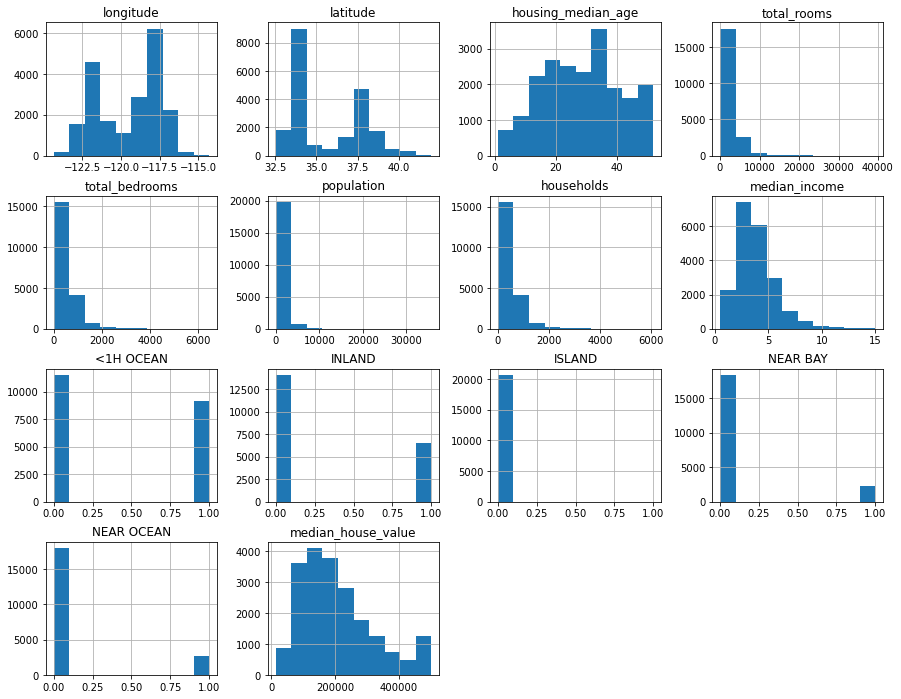

In [22]:
df.hist(figsize=(15,12))

<AxesSubplot:>

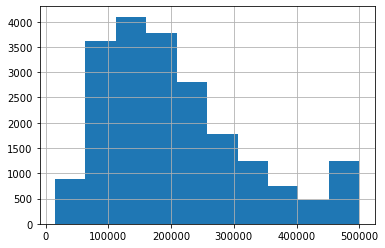

In [23]:
df.median_house_value.hist()

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

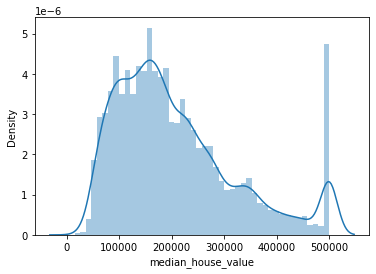

In [24]:
sns.distplot(df.median_house_value)

# Scaling the data

In [25]:
df = df.fillna(df.mean())
df.isna().sum() 

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
median_house_value    0
dtype: int64

In [26]:
from sklearn import preprocessing
convert = preprocessing.StandardScaler() 

In [27]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN',
       'median_house_value'],
      dtype='object')

In [28]:
feature = df.drop(['median_house_value'], axis=1)
label = df.median_house_value

In [29]:
featureT = convert.fit_transform(feature.values)
labelT = convert.fit_transform(df.median_house_value.values.reshape(-1,1)).flatten()

In [30]:
featureT

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [31]:
labelT

array([ 2.12963148,  1.31415614,  1.25869341, ..., -0.99274649,
       -1.05860847, -1.01787803])

# Split the data into train and test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(featureT, labelT, test_size=0.2, random_state=20)

# Linear Regression

In [34]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train, y_train)
r2_score(linear_reg.predict(x_train), y_train)

0.4547310011846454

Cross Validation Score

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(linear_reg, x_train, y_train, cv=10)

array([0.65014975, 0.65346007, 0.68107006, 0.62377123, 0.62015737,
       0.63451892, 0.68060999, 0.63998029, 0.64114707, 0.63392816])

In [37]:
reg_score = r2_score(linear_reg.predict(x_test), y_test)
reg_score

0.4302318809302643

In [38]:
linear_reg.coef_

array([-0.47314651, -0.4837359 ,  0.11511324, -0.07512545,  0.25244112,
       -0.43967292,  0.29614489,  0.62986234,  0.05504057, -0.10531461,
        0.02183649,  0.02023532,  0.04474105])

In [39]:
pd.DataFrame(linear_reg.coef_, index=feature.columns, 
             columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient')

,Coefficient
median_income,0.629862
households,0.296145
total_bedrooms,0.252441
housing_median_age,0.115113
<1H OCEAN,0.055041
NEAR OCEAN,0.044741
ISLAND,0.021836
NEAR BAY,0.020235
total_rooms,-0.075125
INLAND,-0.105315


In [40]:
df.corr().median_house_value.sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
NEAR OCEAN            0.141862
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ISLAND                0.023416
population           -0.024650
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Name: median_house_value, dtype: float64

# Ridge Regressor

In [41]:
ridge_reg = linear_model.Ridge(random_state=20) 
ridge_reg.fit(x_train, y_train)

Ridge(random_state=20)

In [42]:
r2_score(ridge_reg.predict(x_train),y_train)

0.45460345887668274

In [43]:
ridge_score = r2_score(ridge_reg.predict(x_test), y_test)

In [44]:
ridge_score

0.430134687678534

In [45]:
ridge_reg.coef_

array([-0.47217894, -0.48271112,  0.11512697, -0.07496791,  0.25227655,
       -0.43939901,  0.29591199,  0.62981866,  0.0551173 , -0.10553525,
        0.02184348,  0.02032512,  0.04484935])

In [46]:
pd.DataFrame(ridge_reg.coef_, index=feature.columns,
             columns=['Coefficient']).sort_values(ascending=False, by = 'Coefficient') 

,Coefficient
median_income,0.629819
households,0.295912
total_bedrooms,0.252277
housing_median_age,0.115127
<1H OCEAN,0.055117
NEAR OCEAN,0.044849
ISLAND,0.021843
NEAR BAY,0.020325
total_rooms,-0.074968
INLAND,-0.105535


# Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [48]:
r2_score(tree_reg.predict(x_train),y_train)

1.0

It seems overfitting. so we cross validate it.

In [49]:
cross_val_score(tree_reg, x_train, y_train, cv=10)

array([0.63209212, 0.61432608, 0.64194686, 0.66233431, 0.680287  ,
       0.62464437, 0.66561274, 0.61578596, 0.5956911 , 0.62286666])

In [50]:
tree_score = r2_score(tree_reg.predict(x_test), y_test) 
tree_score

0.6664412783347109

# Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [52]:
forest_reg.fit(x_train,  y_train)

RandomForestRegressor()

In [53]:
r2_score(forest_reg.predict(x_train), y_train)

0.9713500971038213

In [54]:
cross_val_score(forest_reg, x_train, y_train, cv=10)

array([0.81036043, 0.82502162, 0.83023733, 0.81029322, 0.80918881,
       0.8103482 , 0.8359472 , 0.80304661, 0.80990104, 0.8087901 ])

In [55]:
forest_score = r2_score(forest_reg.predict(x_test),y_test)

In [56]:
forest_score

0.787577807714011

We can also use GridSearchCV to find the best paramters for random forest regressor

In [58]:
data = [reg_score, ridge_score, tree_score, forest_score]
index = ['Linear Regression', 'Ridge Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
Random Forest Regressor,0.787578
Decision Tree Regressor,0.666441
Linear Regression,0.430232
Ridge Regression,0.430135


Random Forest is the best suited.